##**Programação e Algoritmos I**

Prof Alexandre Levada

###**Recursão**

Dizemos que uma função é recursiva se ela é definida em termos dela mesma. Em matemática e computação uma classe de objetos ou métodos exibe um comportamento recursivo quando pode ser definido por duas propriedades:

1. Um caso base: condição de término da recursão em que o processo produz uma resposta.

2. Um passo recursivo: um conjunto de regras que reduz todos os outros casos ao caso base.

A série de Fibonacci é um exemplo clássico de recursão, pois:

F(1) = 1	(caso base 1)

F(2) = 1	(caso base 2)

Para todo n > 1, F(n) = F(n - 1) + F(n – 2)

**Ex 69:** Faça uma função recursiva em Python para calcular o n-ésimo termo da sequência de Fibonacci.

In [5]:
import time

def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
n = int(input('Enter com o valor de n: '))

inicio = time.time()
resultado = fib(n)
fim = time.time()

print('Fibonacci(%d) = %d' %(n, resultado))
print('Tempo (s): %f' %(fim - inicio))

Enter com o valor de n: 40
Fibonacci(40) = 165580141
Tempo (s): 51.213953


Porque demora tanto para calcular? Veja a seguinte árvore de recursão.

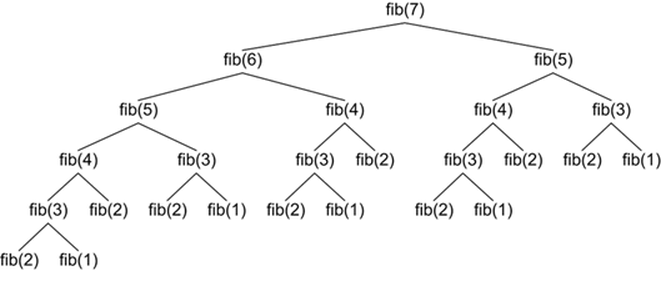

Qual é o número de recursões nevessárias para calcular fib(n)?

Seja $T(n)$ o número de instruções necessárias para calcular o valor de fib(n).

Pela recursão, podemos definir a seguinte recorrência:

$$
T(n) = T(n-1) + T(n-2) + 1
$$

o que significa que o número de operações para calcular fib(n) é igual ao número de operações necessárias para calcular fib(n-1) mais o número de operações necessárias para calcular fib(n-2) mais uma operação básica de soma, que ocorre em tempo constante, por isso a notação 1.

Note que queremos estudar o que acontece quando n é grande. Para n grande, note que $T(n-1) \approx T(n-2)$, o que nos leva a:

$$
T(n) = 2 T(n-1) + 1
$$

Como recursivamente podemos escrever $T(n - 1) = 2T(n - 2) + 1$, temos:

$$
T(n) = 2 ( 2T(n-2) + 1)  + 1
$$

Expandindo novamente, temos:

$$
T(n) = 2 [ 2 ( 2 T(n-3) + 1 ) + 1]  + 1
$$

o que no caso geral tem o seguinte padrão:

$$
T(n) = 2^k T(n-k) + k 
$$

Para que a recursão termine, devemos ter T(0), ou seja, k = n. Logo:

$$
T(n) = 2^n T(0) + n 
$$

Mas o número de instruções para calcular fib(0) é apenas 1, o que nos leva a:

$$
T(n) = 2^n + n
$$

Portanto, para calcular fib(100), será preciso $2^{100} = 1267650600228229401496703205376$ operações!

Supondo que uma instrução leve aproximadamente 1 nanosegundo, que é igual a $10^{-9}$ segundos, teríamos cerca de 1267650600228229401496.703205376 segundos. Sabendo que 1 ano tem aproximadamente $3.15 \times 10^{7}$ segundos, o tempo necessário seriam 40242876197721 anos!

Portanto, para o problema específico da sequência de Fibonacci, a versão iterativa é mais eficiente (recursão é inviável). Porém, existem muitos problemas em computação cuja solução recursiva é mais eficiente que a solução iterativa.
Em computação, algoritmos recursivos existem como uma alternativa a algoritmos iterativos, ou seja, métodos que utilizam explicitamente estruturas de repetição. Com a recursão, podemos eliminar iterações. A seguir veremos uma implementação em Python de uma função recursiva para o cálculo do fatorial de um inteiro arbitrário n.

In [9]:
def fatorial(n):
    if n == 1:
        return 1
    else:
        return n*fatorial(n-1)

n = int(input('Entre com o valor de n: '))
print('%d! = %d' %(n, fatorial(n)))

Entre com o valor de n: 10
10! = 3628800


**Ex 70:** Faça um script recursivo para calcular o somatório a seguir:

$$
S = \sum_{i=1}^{n} i = 1 + 2 + 3 + ... + n
$$

In [10]:
def somatorio(n):
    if n == 1:
        return 1
    else:
        return n + somatorio(n-1)

n = int(input('Entre com o valor de n: '))
print('S = %d' %(somatorio(n)))

Entre com o valor de n: 100
S = 5050


**Ex 71:** Faça um script recursivo para calcular 

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ... 
$$

In [11]:
import math

def fatorial(n):
    if n == 1:
        return 1
    else:
        return n * fatorial(n-1)

def exp(x, n):
    if n == 0:
        return 1
    else:
        return (x**n)/fatorial(n) + exp(x, n-1)

x = float(input('Entre com o valor de x: '))
n = int(input('Número de termos n: '))

print('exp(%.2f) = %.9f' %(x, exp(x, n)))
print('Valor exato: %.9f' %(math.exp(x)))

Entre com o valor de x: 1
Número de termos n: 10
exp(1.00) = 2.718281801
Valor exato: 2.718281828


**Ex 72:** O máximo divisor comum entre dois inteiros a e b é o maior inteiro n que divide tanto a quanto b. Seja a = 1071 e b = 462. Primeiramente, devemos calcular quantas vezes b cabe em a e tomar o excesso, ou seja, sabemos que 1071 // 462 = 2 e 1071 % 462 = 147. O processo é então repetido, fazendo com que calculemos quantas vezes 147 cabe em 462 e tomemos o excesso. Sabemos que 462 // 147 = 3 e 462 % 147 = 21. Fazendo a iteração novamente, temos que 147 // 21 = 7 e 147 % 21 = 0. Como o resto é zero, o algoritmo para e temos que mdc(a, b) = 21.
Faça duas funções para calcular o MDC entre dois inteiros: uma iterativa e outra recursiva.

In [12]:
# Função iterativa
def mdc(a, b):
    while b > 0:
        a, b = b, a % b
    return a

# Função recursiva
def mdc_r(a, b):
    if b == 0:
        return a
    else:
        return mdc_r(b, a % b)

a = int(input('Entre com o valor de a: '))
b = int(input('Entre com o valor de b: '))
print()

print('Iterativo')
print('mdc(%d, %d) = %d' %(a, b, mdc(a, b)))
print()

print('Recursivo')
print('mdc(%d, %d) = %d' %(a, b, mdc_r(a, b)))

Entre com o valor de a: 1071
Entre com o valor de b: 462

Iterativo
mdc(1071, 462) = 21

Recursivo
mdc(1071, 462) = 21


**Ex 73:** Faça uma função recursiva para inverter uma lista. Sugestão: utilize a seguinte ideia – inicie com inicio = 0 e fim = len(L) – 1, depois inverta o primeiro e o último elementos e chame a função recursiva com inicio incrementado de 1 e fim decrementado de 1. A condição de parada deve ser o fim ser menor ou igual que o início.

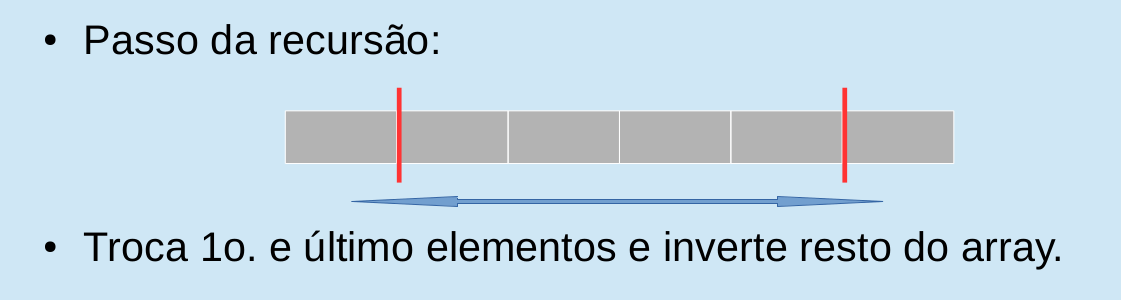

In [14]:
# Função recursiva
def inverte(L, inicio, fim):
    if fim <= inicio:
        return L
    else:
        L[inicio], L[fim] = L[fim], L[inicio]
        inverte(L, inicio+1, fim-1)

L = [1, 2, 3, 4, 5, 6, 7, 8, 9]
inverte(L, 0, len(L) - 1)
print(L)

[9, 8, 7, 6, 5, 4, 3, 2, 1]


**Quicksort**

O algoritmo Quicksort é um método de ordenação que segue o paradigma conhecido como “Dividir para Conquistar” pois ele quebra o problema de ordenar um vetor em subproblemas menores, mais fáceis e rápidos de serem resolvidos. Primeiramente, o método divide o vetor original em duas partes: os elementos menores que o pivô (tipicamente escolhido como o primeiro ou último elemento do conjunto). O método então ordena essas partes de maneira recursiva. O algoritmo pode ser dividido em 3 passos principais:

1. Escolha do pivô: em geral, o pivô é o primeiro ou último elemento do conjunto.

2. Particionamento: reorganizar o vetor de modo que todos os elementos menores que o pivô apareçam antes dele (a esquerda) e os elementos maiores apareçam após ele (a direita). Ao término dessa etapa o pivô estará em sua posição final (existem várias formas de se fazer essa etapa)


3. Ordenação: recursivamente aplicar os passos acima aos sub-vetores produzidos durante o particionamento. O caso limite da recursão é o sub-vetor de tamanho 1, que não precisa ser ordenado.

Exemplo: mostre os passos necessários para a ordenação do seguinte vetor

[5, 2, 13, 7, -3, 4, 15, 10, 1, 6]

1o passo: Definir pivô = 6 (último elemento)

2o passo: Particionar vetor (menores a esquerda e maiores a direita)

[5, 2, -3, 4, 1, 6, 13, 7, 15, 10]

3o passo: Aplicar 1 e 2 recursivamente para as metades

a) 2 metades

Metade 1: [5, 2, -3, 4, 1] →  pivô = 1

[-3, 1, 5, 2, 4,  6, 13, 7, 15, 10]

Metade 2: [13, 7, 15, 10] →  pivô = 10

[-3, 1, 5, 2, 4,  6, 7, 10, 15, 13]

b) 4 metades

Note que a metade 1 possui um único elemento: [-3] → já está ordenada

Metade 2: [5, 2, 4] → pivô = 4

[-3, 1, 2, 4, 5,  6, 7, 10, 15, 13]

Note que a metade 3 possui apenas um único elemento: [7] → já está ordenadas

Metade 4: [15, 13] → pivô = 13

[-3, 1, 2, 4, 5,  6, 7, 10, 13, 15]

c) 4 metades: Note que cada uma das 4 metades restantes contém um único elemento e portanto já estão ordenadas. Fim.

A seguir veremos uma implementação em Python para o algoritmo Quicksort.

In [17]:
import numpy as np

# Implementa o quicksort recursivo para ordenar uma lista
def quicksort(L):
    if len(L) <= 1:
        return L
    m = L[0]	# pivô é o primeiro elemento da lista
    return  quicksort([x for x in L if x < m]) + [x for x in L if x == m] + quicksort([x for x in L if x > m])

L = [5, 1, -3, 8, 4, 7, 0, 2, 9, 6]
print(L)
X = quicksort(L)
print(X)

[5, 1, -3, 8, 4, 7, 0, 2, 9, 6]
[-3, 0, 1, 2, 4, 5, 6, 7, 8, 9]


**Busca binária**

Vimos anteriormente que a busca sequencial percorre a lista toda elemento por elemento na busca pelo valor desejado. A busca binária é uma estratégia mais inteligente, pois requer uma lista ordenada de elementos para funcionar. Basicamente, a ideia consiste em acessar o elemento do meio da lista. Se ele for o que desejamos buscar, a busca se encerra. Caso contrário, se o que desejamos é menor que o elemento do meio, a busca é realizada na metade a esquerda. Senão, a busca é realizada na metade a direita. Em resumo, a busca binária simula o processo pelo qual buscamos uma palavra no dicionário. A seguir mostramos um script em Python que implementa a versão recursiva da busca binária.

In [18]:
import random

# Função recursiva
def binary_search(lista, x, ini, fim):
    meio = ini + (fim - ini) // 2
    if ini > fim:
        return -1   		# elemento não encontrado
    elif lista[meio] == x:
        return meio
    elif lista[meio] > x:
        print('Buscar na metade inferior')
        return binary_search(lista, x, ini, meio-1)
    else:
        print('Buscar na metade superior')
        return binary_search(lista, x, meio+1, fim)

# Cria lista com valores aleatórios
L = []
for i in range(100):
    x = random.randint(1, 5000)
    while x in L:
        x = random.randint(1, 1000)
    L.append(x)

print('Lista de números: ')
print(L)

valor = int(input('Entre com o elemento a ser buscado: '))

# Ordena a lista
L.sort()
# Realiza a busca binária
y = binary_search(L, valor, 0, len(L)-1)

if y == -1:
    print('Elemento %d não encontrado.' %valor)
else:
    print('Elemento %d está na posição %d' %(valor, y))

Lista de números: 
[1706, 1742, 1296, 2161, 391, 3013, 2140, 292, 1130, 1366, 469, 2924, 1806, 3112, 948, 1, 2146, 127, 987, 1669, 412, 4879, 4748, 2201, 2752, 2031, 4556, 4761, 4585, 1917, 4305, 1187, 1620, 498, 2967, 2073, 3989, 2415, 1189, 3634, 389, 4486, 2617, 3000, 3672, 1995, 2992, 53, 4655, 2631, 1482, 2636, 303, 4623, 3594, 3126, 4811, 2922, 2690, 4908, 291, 3226, 2379, 4912, 4691, 4413, 3937, 942, 1433, 3213, 4321, 2721, 4508, 3321, 3749, 3924, 1606, 988, 1469, 4673, 4961, 4385, 3371, 1882, 4567, 3062, 2729, 2578, 2645, 29, 226, 4596, 912, 3458, 1249, 4615, 1827, 1017, 4772, 4220]
Entre com o elemento a ser buscado: 12
Buscar na metade inferior
Buscar na metade inferior
Buscar na metade inferior
Buscar na metade inferior
Buscar na metade inferior
Buscar na metade superior
Buscar na metade inferior
Elemento 12 não encontrado.


Note que no pior caso, que é quando o valor buscado não pertence a lista, a busca sequencial realiza n acessos até chegar ao final e retornar que o valor não pertence a lista. Na busca binária, esse número de acessos é muito menor. Como pudemos ver no exemplo, em um vetor de tamanho 100, foram necessário apenas 7 acessos para concluirmos que o valor não pertence a lista. Isso ocorre porque o número máximo de acessos que a busca binária precisa para buscar um elemento é $log n$, onde $n$ é o tamanho da lista. Como o valor $log n$ é muito menor que $n$ para $n>0$, a busca binária é mais eficiente.

"When you're always trying to conform to the norm, you lose your uniqueness, which can be the foundation for your greatness."
-- Dale Archer